In [7]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
import yfinance as yf
import pandas as pd
from datetime import datetime

ticker_symbol = 'MSFT'

start_date = '2014-12-01'
end_date = '2022-12-31'

MSFT_data = yf.download(ticker_symbol, start=start_date, end=end_date)
MSFT=MSFT_data

[*********************100%%**********************]  1 of 1 completed


In [9]:
df=MSFT_data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-01,47.880001,48.779999,47.709999,48.619999,41.984200,31191600
2014-12-02,48.840000,49.049999,48.200001,48.459999,41.846050,25773500
2014-12-03,48.439999,48.500000,47.810001,48.080002,41.517906,23534800
2014-12-04,48.389999,49.060001,48.200001,48.840000,42.174179,30320400
2014-12-05,48.820000,48.970001,48.380001,48.419998,41.811508,27313400
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,236.195023,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443832,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.039627,17457100


print(df.head())
print(df.shape)

In [10]:
df_10 = pd.DataFrame()
df_10['Adj Close'] = df['Adj Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Adj Close'] = df['Adj Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Adj Close'] = df['Adj Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Adj Close'] = df['Adj Close'].rolling(window=40).mean()

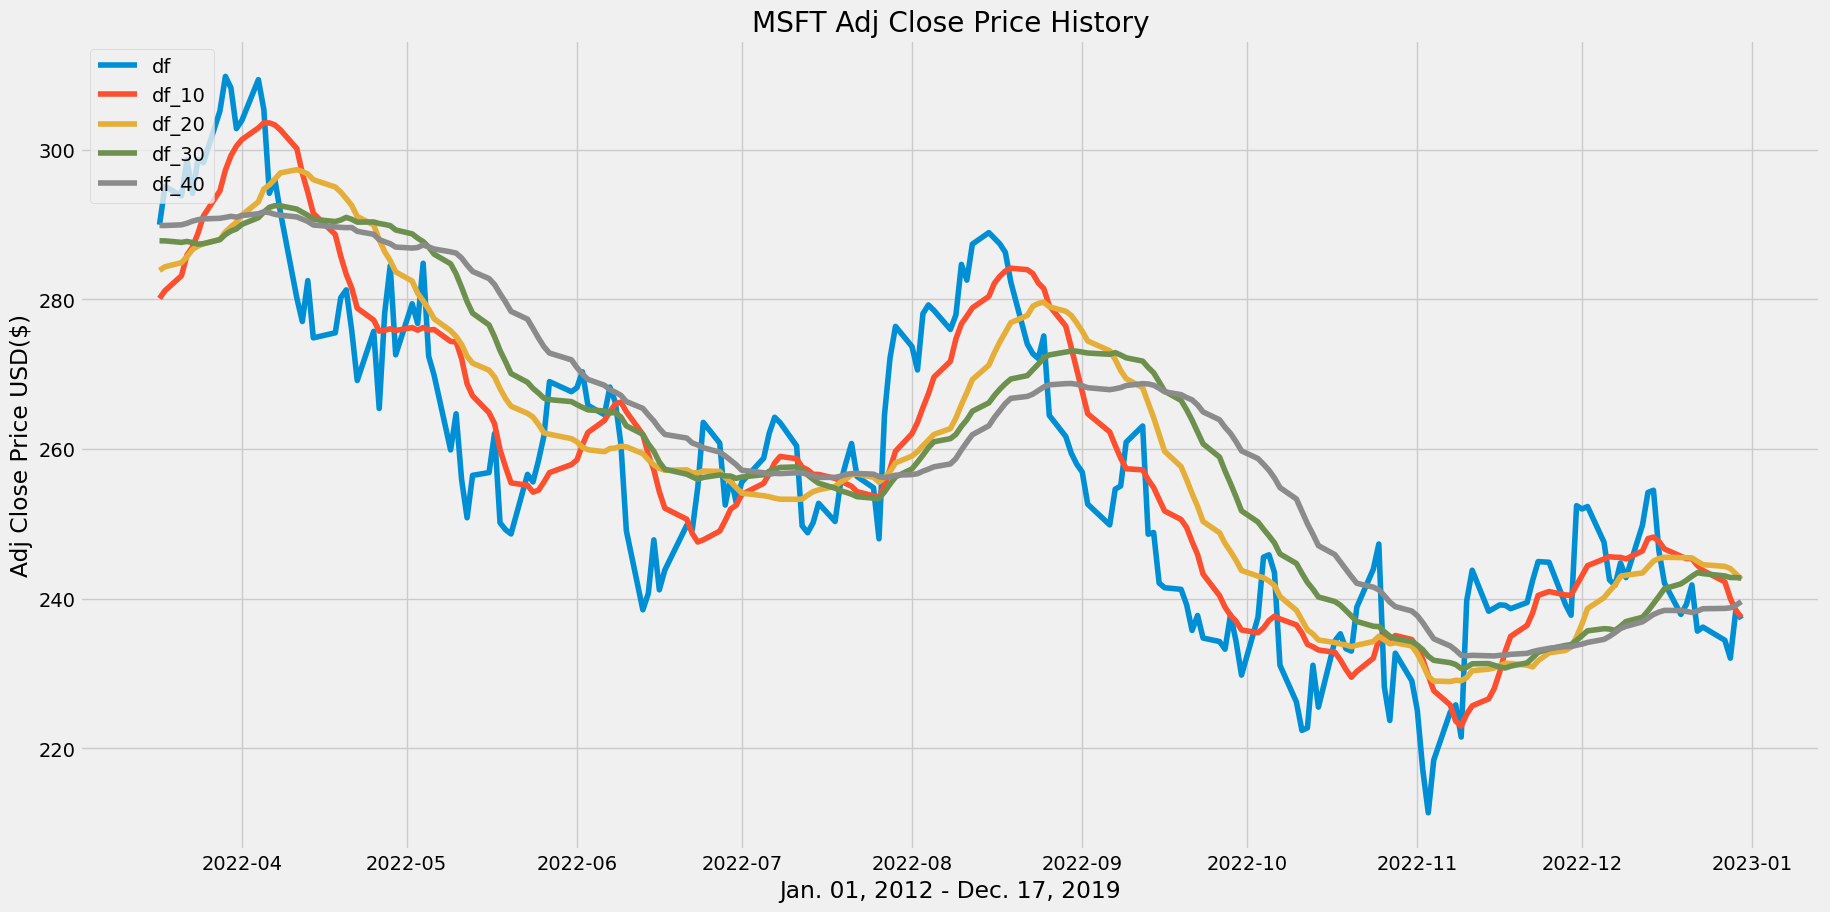

In [11]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Adj Close'].tail(200), label='df')
plt.plot(df_10['Adj Close'].tail(200), label='df_10')
plt.plot(df_20['Adj Close'].tail(200), label='df_20')
plt.plot(df_30['Adj Close'].tail(200), label='df_30')
plt.plot(df_40['Adj Close'].tail(200), label='df_40')
plt.title('MSFT Adj Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [12]:
data = df.filter(['Adj Close'])
data.head()

,Adj Close
Date,
2014-12-01,41.984200
2014-12-02,41.846050
2014-12-03,41.517906
2014-12-04,42.174179
2014-12-05,41.811508


In [13]:
#Convert the dataframe to a numpy array
dataset = data.values

In [14]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1629

In [15]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.02354811],
        [0.02308979],
        [0.02200116],
        ...,
        [0.65406237],
        [0.67533159],
        [0.67142569]]),
 (2036, 1))

In [16]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.02354811, 0.02308979, 0.02200116, 0.02417837, 0.0229752 ,
       0.02091263, 0.02059743, 0.01862081, 0.01939426, 0.01876404,
       0.01796186, 0.01363612, 0.01529767, 0.02039693, 0.02079798,
       0.02171471, 0.02306115, 0.02217309, 0.02142824, 0.0201964 ,
       0.01896453, 0.01733168, 0.01821972, 0.01698789, 0.01503988,
       0.01670141, 0.02059743, 0.01945155, 0.01776134, 0.01707384,
       0.01592796, 0.01455286, 0.01673004, 0.01715977, 0.01581337,
       0.01927968, 0.01942292, 0.01893593, 0.00647426, 0.00226308,
       0.00461216, 0.        , 0.00252096, 0.00343764, 0.00412518,
       0.00587271, 0.0057581 , 0.00561486, 0.00630236, 0.00567216,
       0.00770609, 0.00994058, 0.00999827, 0.00985403, 0.00976747,
       0.01080616, 0.01164285, 0.01146975, 0.01118124, 0.01138319])]
[0.010777284624870195]

[array([0.02354811, 0.02308979, 0.02200116, 0.02417837, 0.0229752 ,
       0.02091263, 0.02059743, 0.01862081, 0.01939426, 0.01876404,
       0.01796186, 0.01363612, 0.0

In [17]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1569, 60, 1)

In [19]:
# Original dataset length
total_data_len = len(data)

# Calculate the end index for the training data
end_index_training_data = training_data_len - 1

# Extract the corresponding dates from the original dataframe
start_date_training_data = df.index[60]  # 60 is the window size used in the loop
end_date_training_data = df.index[end_index_training_data]

print(f"Training Data: {start_date_training_data} to {end_date_training_data}")

Training Data: 2015-02-27 00:00:00 to 2021-05-20 00:00:00


In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1569/1569 [==============================] - 59s 35ms/step - loss: 9.4845e-04
Epoch 2/10
1569/1569 [==============================] - 51s 33ms/step - loss: 4.5292e-04
Epoch 3/10
1569/1569 [==============================] - 48s 31ms/step - loss: 3.2117e-04
Epoch 4/10
1569/1569 [==============================] - 49s 31ms/step - loss: 2.6086e-04
Epoch 5/10
1569/1569 [==============================] - 48s 31ms/step - loss: 2.3150e-04
Epoch 6/10
1569/1569 [==============================] - 48s 31ms/step - loss: 2.2790e-04
Epoch 7/10
1569/1569 [==============================] - 47s 30ms/step - loss: 2.1135e-04
Epoch 8/10
1569/1569 [==============================] - 48s 31ms/step - loss: 2.1149e-04
Epoch 9/10
1569/1569 [==============================] - 48s 31ms/step - loss: 1.5877e-04
Epoch 10/10
1569/1569 [==============================] - 49s 31ms/step - loss: 1.6378e-04


In [23]:
## Create the testing data set
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [24]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [25]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 18ms/step


In [27]:
print(predictions[0:5], y_test[0:5])

[[245.29704]
 [245.05447]
 [249.04974]
 [250.80573]
 [250.73824]] [[239.4176178 ]
 [244.89604187]
 [245.81396484]
 [245.58937073]
 [243.460495  ]]


In [28]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(37.78308446362871, 6.146794649541231)

<ipython-input-29-59aa11c1e83f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


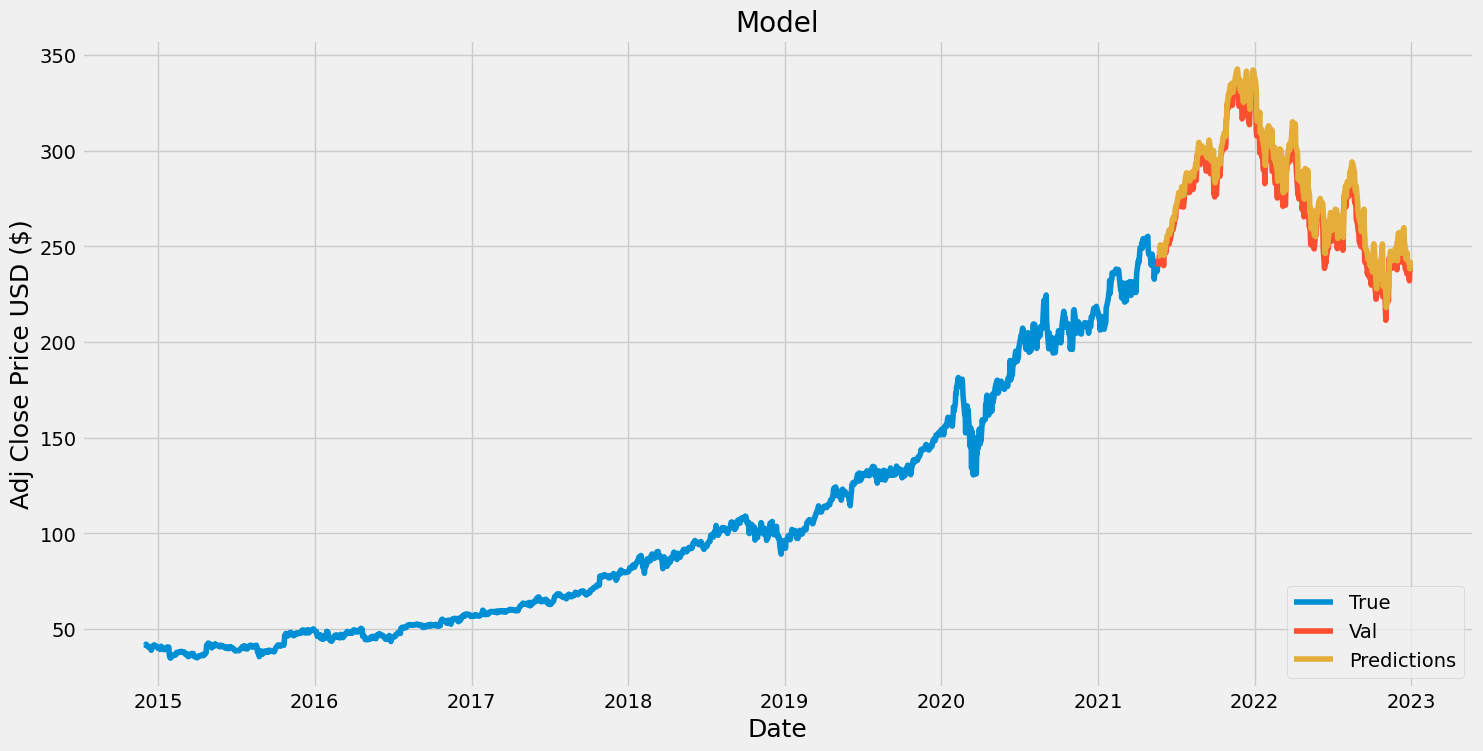

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [30]:
!pip install pandas_datareader --upgrade

In [31]:
ticker_symbol = 'MSFT'
start_date = '2014-12-01'
end_date = '2022-12-31'

# Fetch historical data using yfinance
MSFT_quote = yf.download(ticker_symbol, start=start_date, end=end_date)

# Create a new dataframe
new_df = MSFT_quote.filter(['Adj Close'])

# Check for missing values and drop them
new_df = new_df.dropna()

# Check if you have at least 60 days of data
if len(new_df) < 60:
    raise ValueError("Insufficient data. Ensure you have at least 60 days of historical data.")

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
last_60_days_scaled = scaler.fit_transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 26ms/step
[[238.77763]]


In [32]:
ticker_symbol = 'MSFT'

# Set up start and end dates
start_date = '2014-12-01'
end_date = '2022-12-31'
# Fetch historical data using yfinance
MSFT_quote2 = yf.download(ticker_symbol, start=start_date, end=end_date)
MSFT_quote2.tail(1)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-30,238.210007,239.960007,236.660004,239.820007,237.273438,21938500


In [33]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import prophet

In [34]:
df = df.reset_index()

In [35]:
df.shape, df.tail(), df.columns

((2036, 7),
            Date        Open        High         Low       Close   Adj Close  \
 2031 2022-12-23  236.110001  238.869995  233.940002  238.729996  236.195023   
 2032 2022-12-27  238.699997  238.929993  235.830002  236.960007  234.443832   
 2033 2022-12-28  236.889999  239.720001  234.169998  234.529999  232.039627   
 2034 2022-12-29  235.649994  241.919998  235.649994  241.009995  238.450790   
 2035 2022-12-30  238.210007  239.960007  236.660004  239.820007  237.273438   
 
         Volume  
 2031  21207000  
 2032  16688600  
 2033  17457100  
 2034  19770700  
 2035  21938500  ,
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'))

In [36]:
df = df.filter(['Date','Adj Close'])
df.head()

,Date,Adj Close
0,2014-12-01,41.984200
1,2014-12-02,41.846050
2,2014-12-03,41.517906
3,2014-12-04,42.174179
4,2014-12-05,41.811508


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2036 non-null   datetime64[ns]
 1   Adj Close  2036 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.9 KB


In [38]:
df.index[df['Adj Close'] < 0]

Int64Index([], dtype='int64')

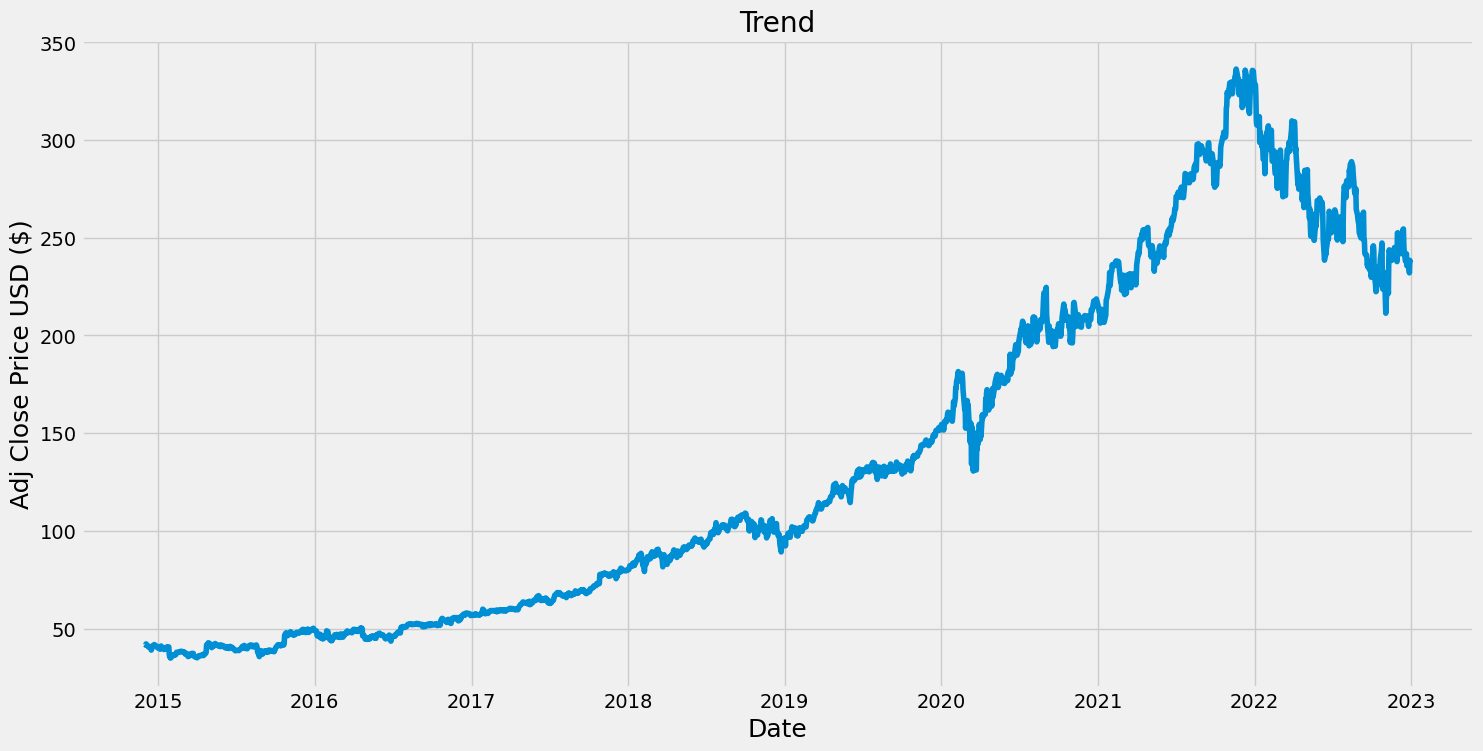

In [39]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [40]:
# yt = yt-y(t-1)
df['Adj Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)
y = df['Adj Close_shift']

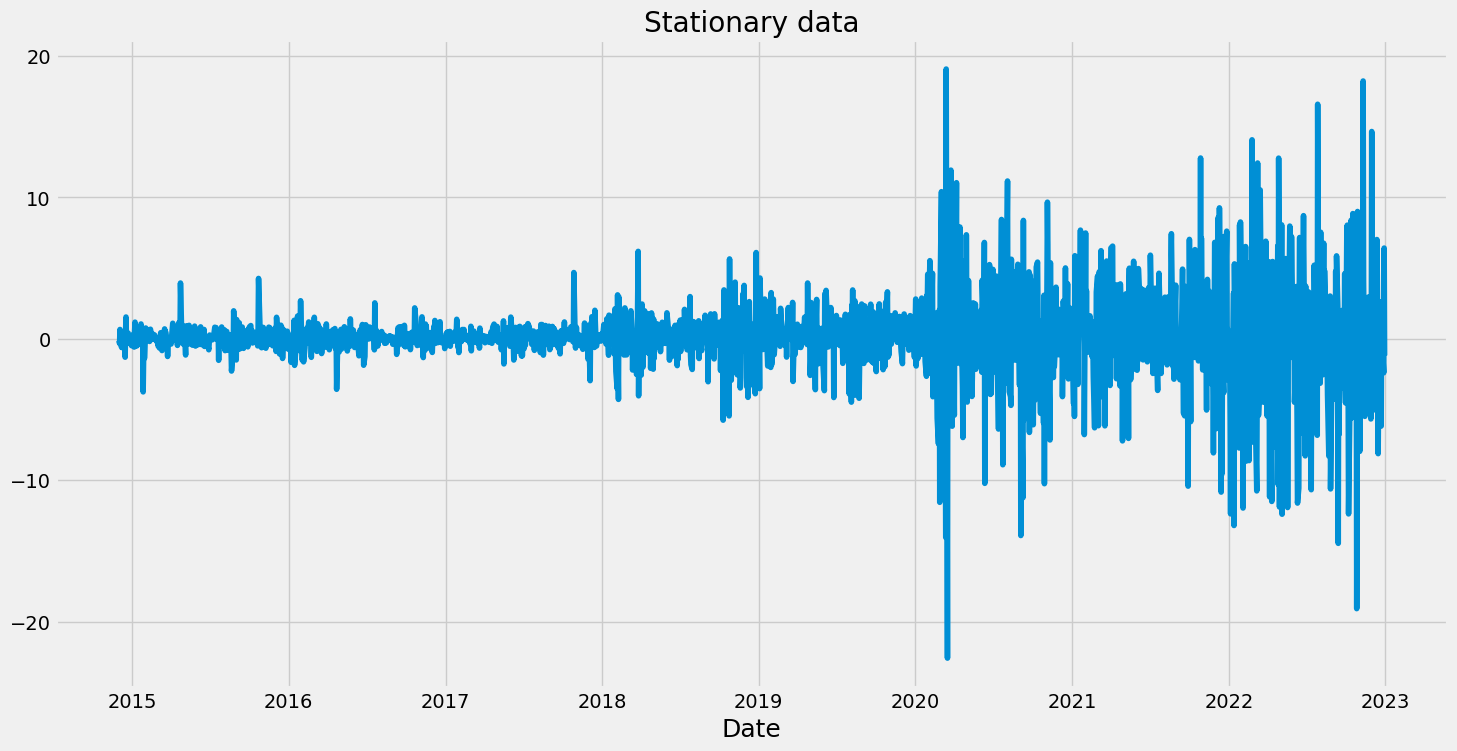

In [41]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [42]:
from prophet import Prophet

In [43]:
model = Prophet()

In [44]:
df.columns

Index(['Date', 'Adj Close', 'Adj Close_shift'], dtype='object')

In [45]:
## Rename the columns as ds and y
df_pht = df.rename(columns={'Date':'ds', 'Adj Close_shift':'y'})#, inplace=True)

In [46]:
df_pht.head()

,ds,Adj Close,y
0,2014-12-01,41.984200,NaN
1,2014-12-02,41.846050,-0.138149
2,2014-12-03,41.517906,-0.328144
3,2014-12-04,42.174179,0.656273
4,2014-12-05,41.811508,-0.362671


In [47]:
## Split the Data
train_data_len = int(0.8*len(df))
train_data_len

1628

In [48]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds  Adj Close         y
 0 2014-12-01  41.984200       NaN
 1 2014-12-02  41.846050 -0.138149
 2 2014-12-03  41.517906 -0.328144
 3 2014-12-04  42.174179  0.656273
 4 2014-12-05  41.811508 -0.362671,
 (1628, 3))

In [49]:
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gwxj8bn/u5p_r37t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gwxj8bn/3yy9ks6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78577', 'data', 'file=/tmp/tmp3gwxj8bn/u5p_r37t.json', 'init=/tmp/tmp3gwxj8bn/3yy9ks6s.json', 'output', 'file=/tmp/tmp3gwxj8bn/prophet_model27kdjq_r/prophet_model-20240221213634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:36:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:36:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
periods = len(df)-len(df_train)
periods

408

In [51]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [52]:
# Shape after adding 401 days
future_dates.shape

(2035, 1)

In [53]:
future_dates.head()

,ds
0,2014-12-02
1,2014-12-03
2,2014-12-04
3,2014-12-05
4,2014-12-08


In [54]:
# Make Prediction
prediction = model.predict(future_dates)

In [55]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-02,-0.045140,-2.974658,2.676068,-0.045140,-0.045140,-0.119557,-0.119557,-0.119557,-0.031779,-0.031779,-0.031779,-0.087778,-0.087778,-0.087778,0.0,0.0,0.0,-0.164697
1,2014-12-03,-0.045018,-2.894380,2.570783,-0.045018,-0.045018,-0.022818,-0.022818,-0.022818,0.048757,0.048757,0.048757,-0.071575,-0.071575,-0.071575,0.0,0.0,0.0,-0.067835
2,2014-12-04,-0.044896,-2.828768,2.759675,-0.044896,-0.044896,-0.039336,-0.039336,-0.039336,0.015035,0.015035,0.015035,-0.054371,-0.054371,-0.054371,0.0,0.0,0.0,-0.084232
3,2014-12-05,-0.044774,-3.101527,2.669954,-0.044774,-0.044774,0.015389,0.015389,0.015389,0.052052,0.052052,0.052052,-0.036662,-0.036662,-0.036662,0.0,0.0,0.0,-0.029384
4,2014-12-08,-0.044408,-2.860965,2.895321,-0.044408,-0.044408,0.023311,0.023311,0.023311,0.008933,0.008933,0.008933,0.014379,0.014379,0.014379,0.0,0.0,0.0,-0.021096


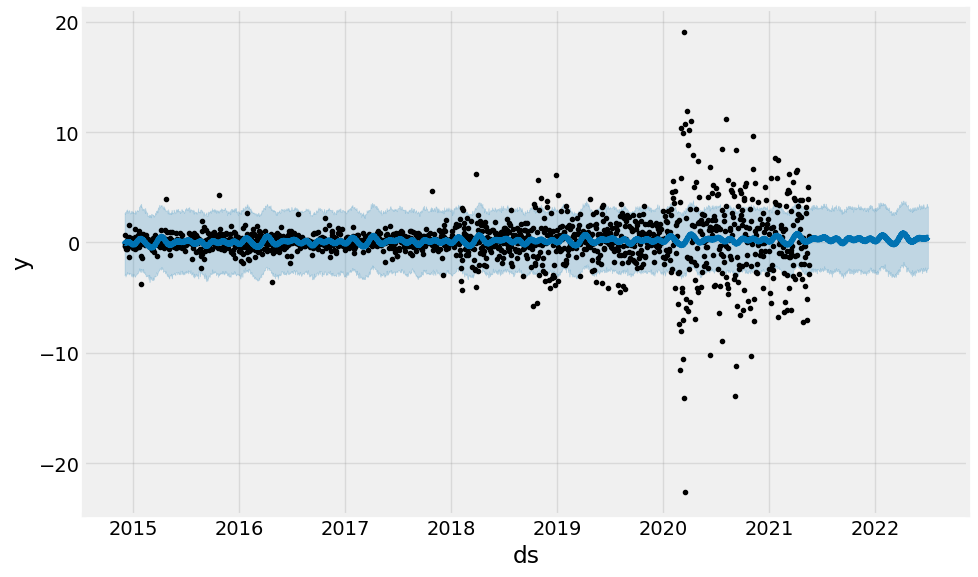

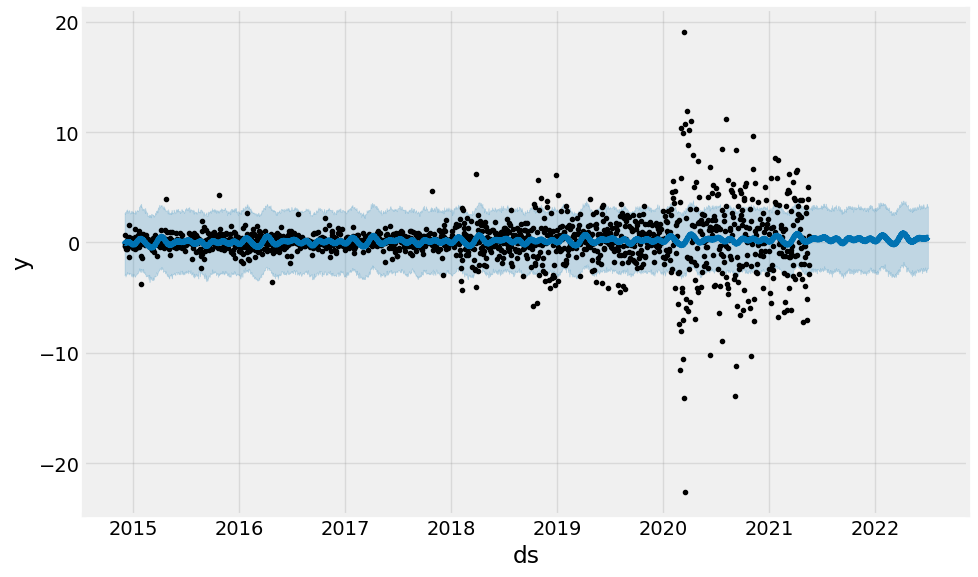

In [56]:
# Plot Our Predictions
model.plot(prediction)

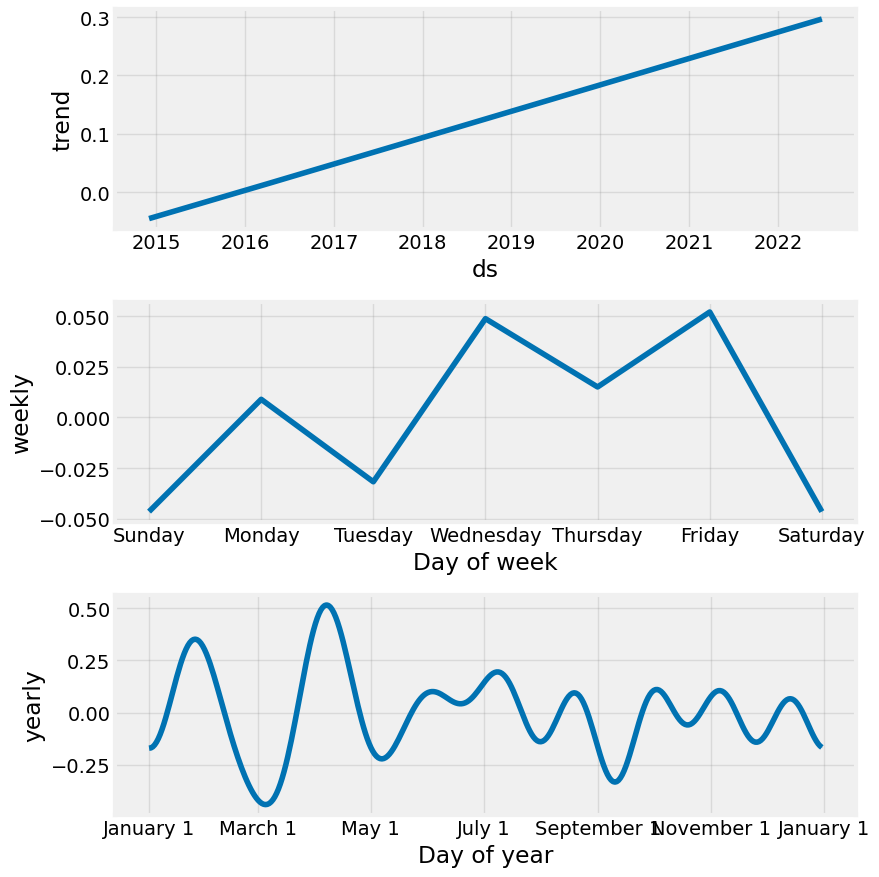

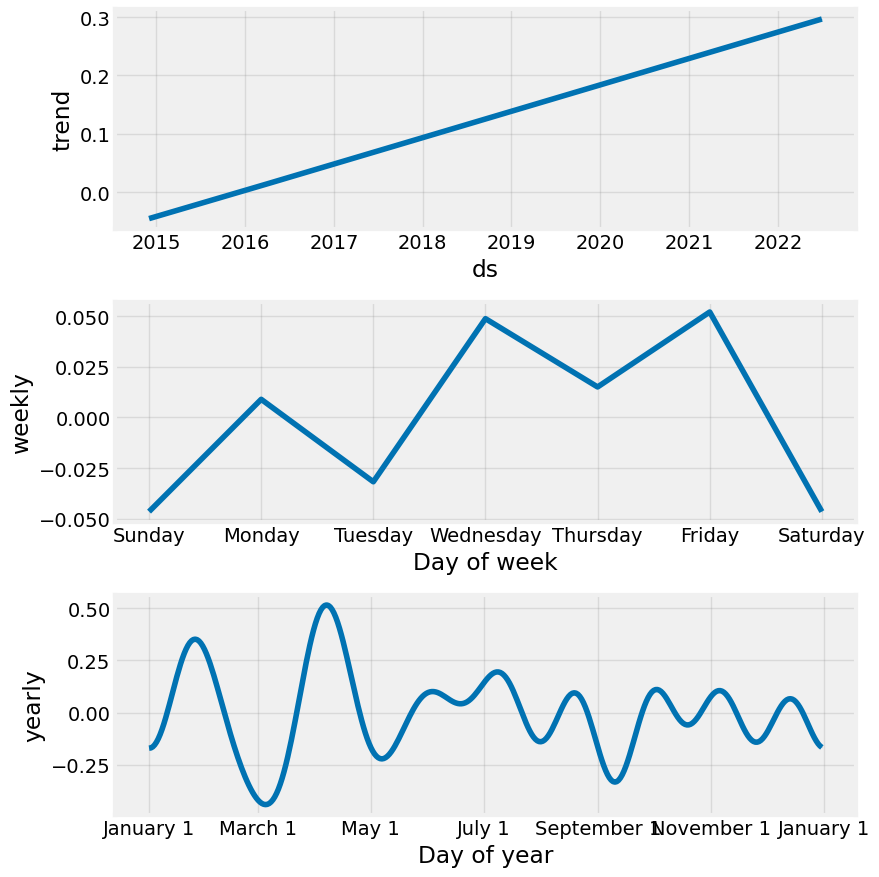

In [57]:
model.plot_components(prediction)

In [58]:
from prophet.diagnostics import cross_validation

In [59]:
df_train.shape, len(df)-len(df_train)

((1628, 3), 408)

In [60]:
cv = cross_validation(model, initial='600 days', period='1 days', horizon='427 days')

INFO:prophet:Making 1334 forecasts with cutoffs between 2016-07-24 00:00:00 and 2020-03-18 00:00:00


  0%|          | 0/1334 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44429', 'data', 'file=/tmp/tmp3gwxj8bn/6kw3y8qu.json', 'init=/tmp/tmp3gwxj8bn/rgcopkn3.json', 'output', 'file=/tmp/tmp3gwxj8bn/prophet_modelyjgp226z/prophet_model-20240221214116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:41:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gwxj8bn/jtfdv2i2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gwxj8bn/mavnr1zi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34941', 'data', 'file=/tmp/tmp3gwxj8bn/jtfdv2i2.json', 'init=/tm

In [61]:
cv.head(), cv.shape

(          ds      yhat  yhat_lower  yhat_upper         y     cutoff
 0 2016-07-25  0.244613   -0.642355    1.203237  0.143951 2016-07-24
 1 2016-07-26  0.188342   -0.758483    1.146731  0.026985 2016-07-24
 2 2016-07-27  0.282488   -0.634605    1.256503 -0.512787 2016-07-24
 3 2016-07-28  0.267185   -0.580228    1.184000  0.017986 2016-07-24
 4 2016-07-29  0.155444   -0.818818    1.084542  0.422832 2016-07-24,
 (392362, 6))

In [62]:
from prophet.diagnostics import performance_metrics

In [63]:
df_train_pm = performance_metrics(cv)

INFO:prophet:Skipping MAPE because y close to 0


In [64]:
df_train_pm

,horizon,mse,rmse,mae,mdape,smape,coverage
0,43 days,4.472654,2.114865,1.140175,1.010257,1.637093,0.691910
1,44 days,4.493069,2.119686,1.143088,1.010291,1.637090,0.691361
2,45 days,4.513663,2.124538,1.145998,1.010227,1.637350,0.690718
3,46 days,4.534352,2.129402,1.148920,1.010233,1.637755,0.690136
4,47 days,4.555305,2.134316,1.151924,1.010242,1.638009,0.689584
...,...,...,...,...,...,...,...
380,423 days,8.358485,2.891104,1.834958,0.997392,1.665951,0.476533
381,424 days,8.366485,2.892488,1.836584,0.997295,1.665802,0.475885
382,425 days,8.374305,2.893839,1.838197,0.997218,1.665607,0.475384
383,426 days,8.381432,2.895070,1.839749,0.997218,1.665480,0.474867


In [65]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

(6.5535951548082645, 2.5491910361357855)

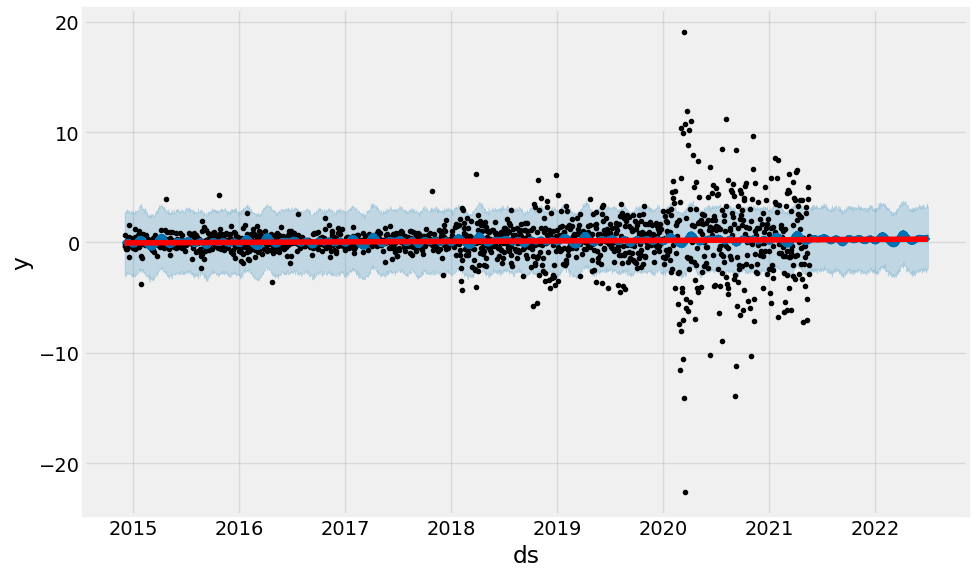

In [66]:

from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

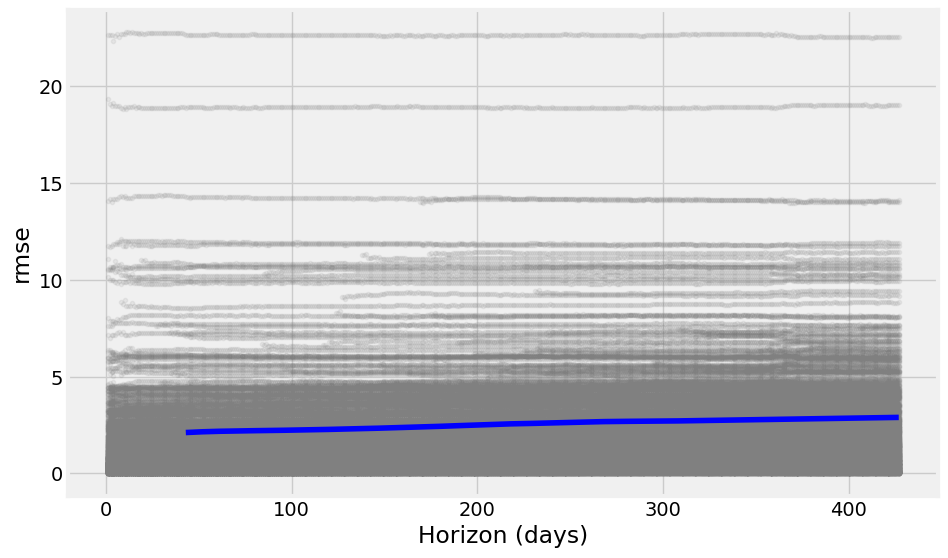

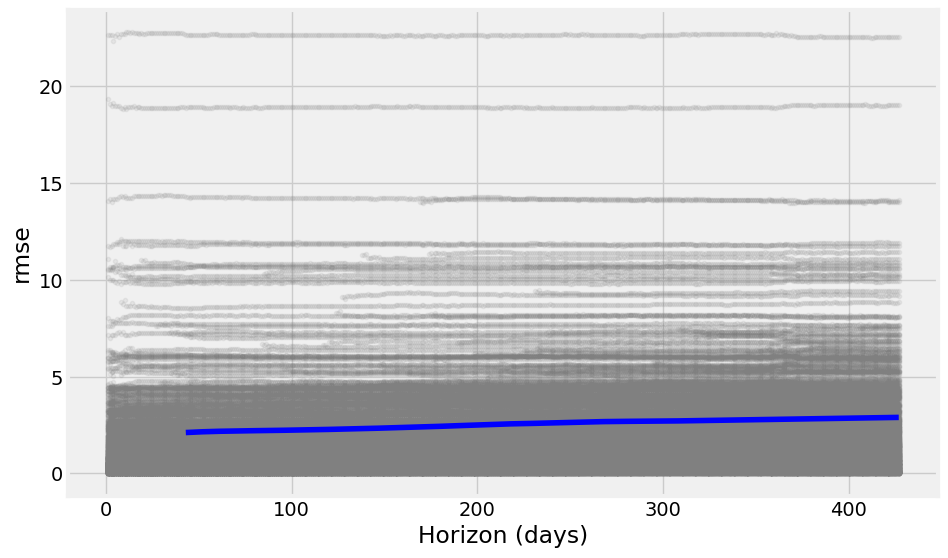

In [67]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

In [68]:
import numpy as np
import pandas as pd
import os
import pandas_datareader as web
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
warnings.filterwarnings('ignore')

<ipython-input-68-6605b0c61bbf>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math
<ipython-input-68-6605b0c61bbf>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [69]:
DF=MSFT
df=DF

In [75]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-01,47.880001,48.779999,47.709999,48.619999,41.984200,31191600
1,2014-12-02,48.840000,49.049999,48.200001,48.459999,41.846050,25773500
2,2014-12-03,48.439999,48.500000,47.810001,48.080002,41.517906,23534800
3,2014-12-04,48.389999,49.060001,48.200001,48.840000,42.174179,30320400
4,2014-12-05,48.820000,48.970001,48.380001,48.419998,41.811508,27313400
...,...,...,...,...,...,...,...
2031,2022-12-23,236.110001,238.869995,233.940002,238.729996,236.195023,21207000
2032,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443832,16688600
2033,2022-12-28,236.889999,239.720001,234.169998,234.529999,232.039627,17457100
2034,2022-12-29,235.649994,241.919998,235.649994,241.009995,238.450790,19770700


In [71]:
df = df.reset_index()

In [72]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

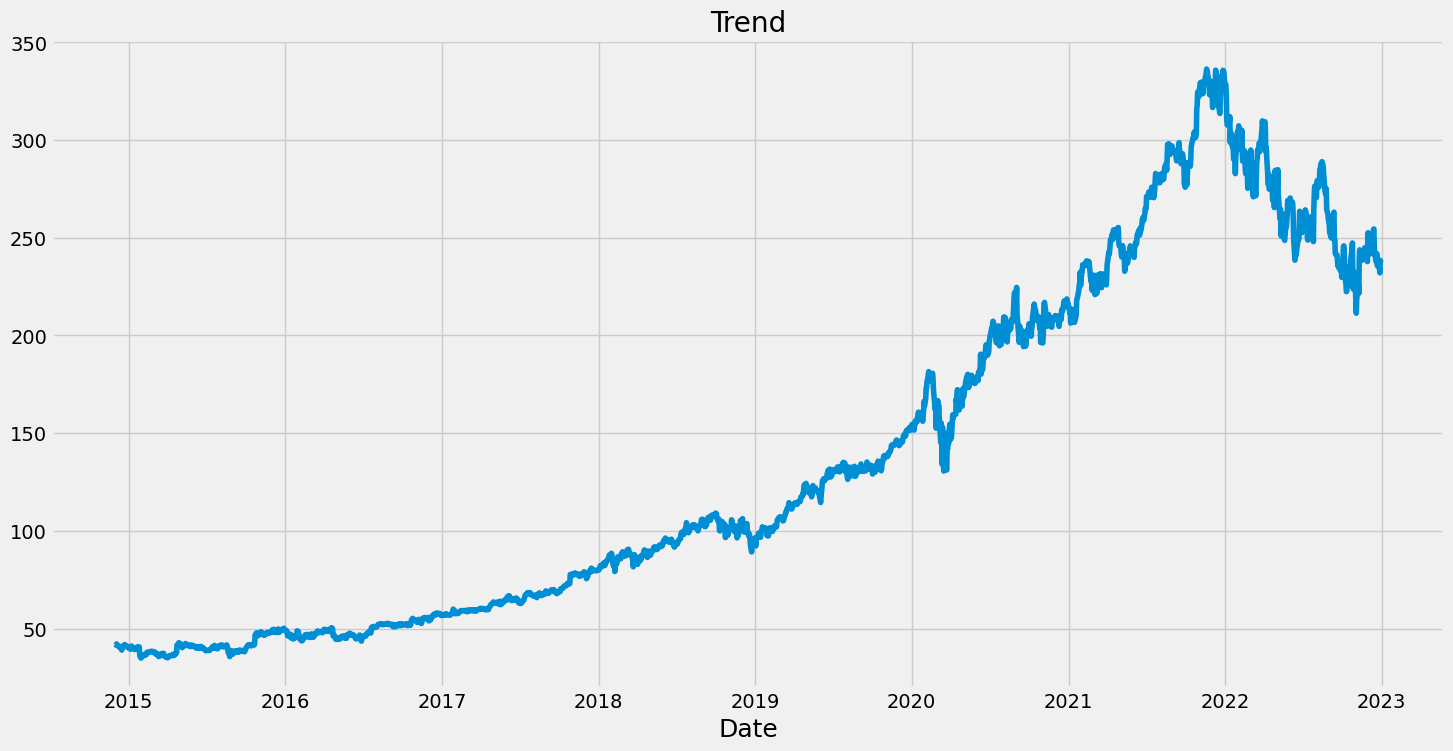

In [73]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller

In [76]:
test_result = adfuller(df['Adj Close'])

In [77]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(Adj_Close):
  result = adfuller(Adj_Close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [78]:
adfuller_test(df['Adj Close'])

ADF Test Statistics : -0.5921845926359163
p-value : 0.872738227593399
#Lags Used : 9
Number of Observations Used : 2026
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [79]:
df['Adj Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)
df['Adj Close_shift'] = df['Adj Close_shift'].fillna(method='bfill')
df['Adj Close_shift']

0      -0.138149
1      -0.138149
2      -0.328144
3       0.656273
4      -0.362671
          ...   
2031    0.534271
2032   -1.751190
2033   -2.404205
2034    6.411163
2035   -1.177353
Name: Adj Close_shift, Length: 2036, dtype: float64

In [80]:
test_result = adfuller(df['Adj Close_shift'])

In [81]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(Adj_Close):
  result = adfuller(Adj_Close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [82]:
adfuller_test(df['Adj Close_shift'])

ADF Test Statistics : -15.323576478984855
p-value : 4.033480168392785e-28
#Lags Used : 8
Number of Observations Used : 2027
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


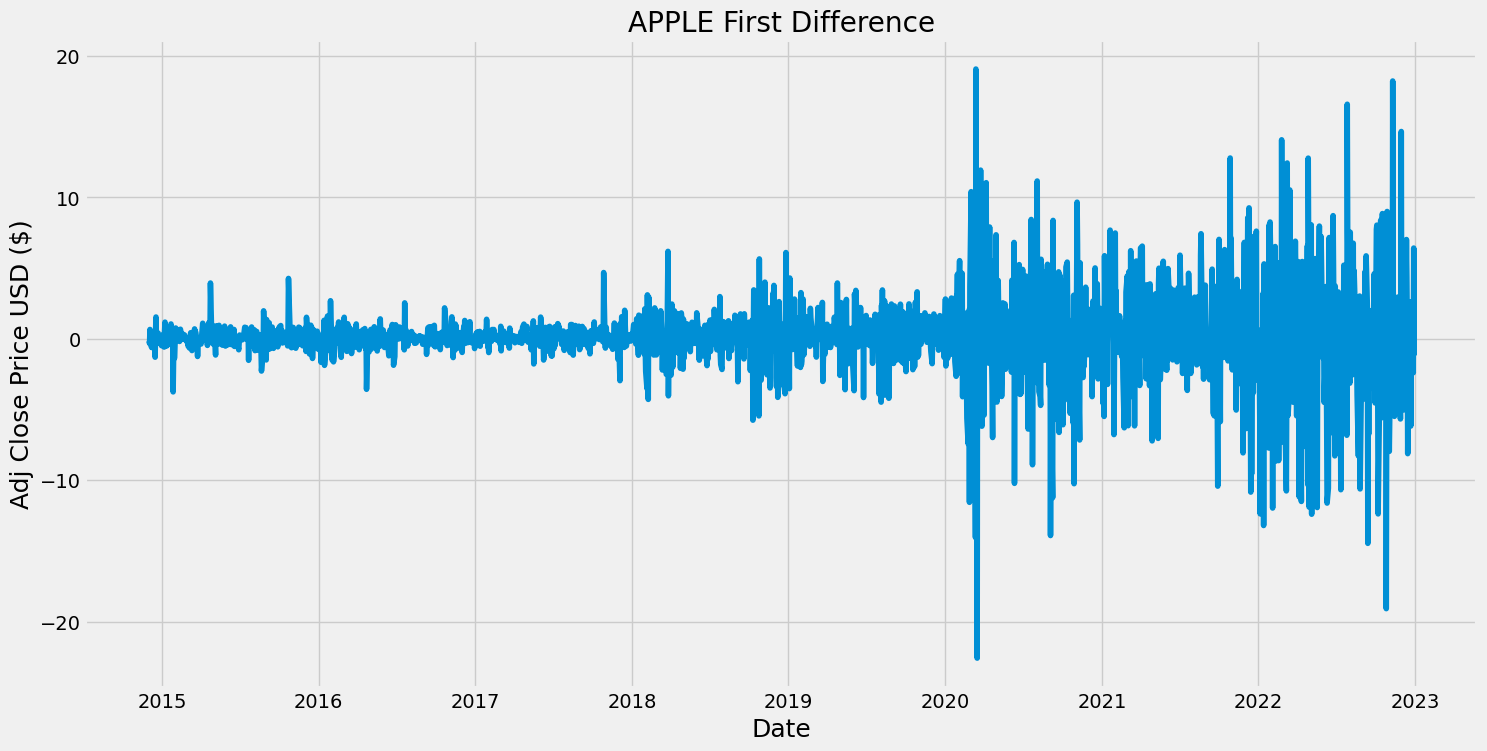

In [83]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

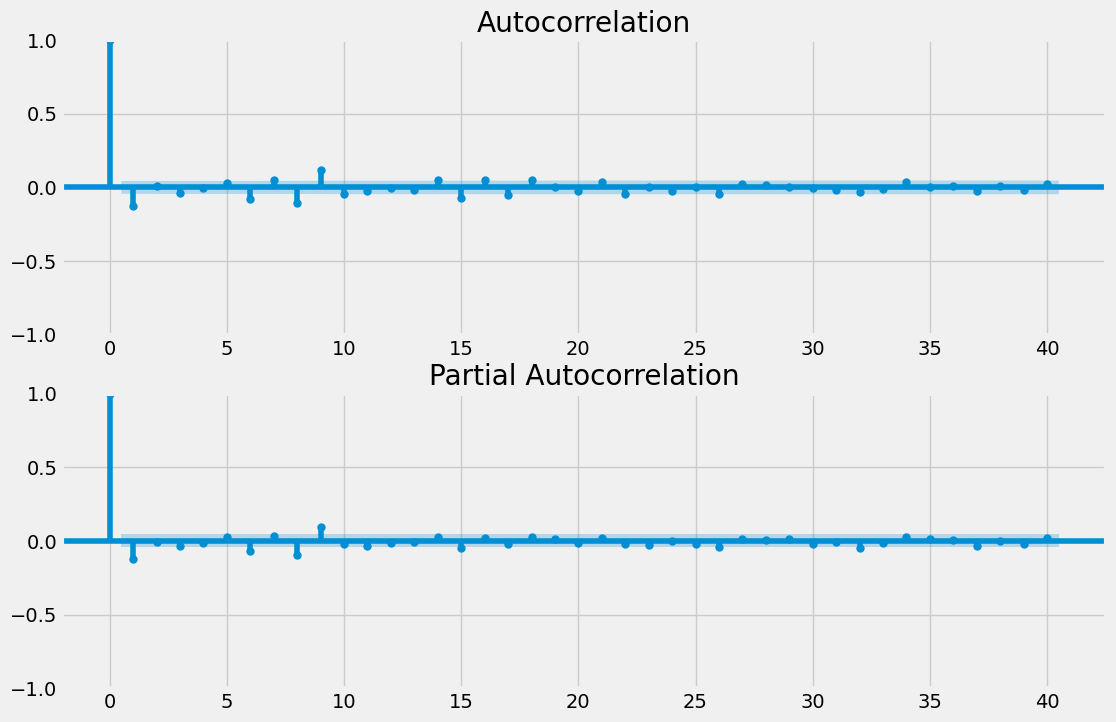

In [84]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Adj Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Adj Close_shift'].iloc[1:],lags=40,ax=ax2)

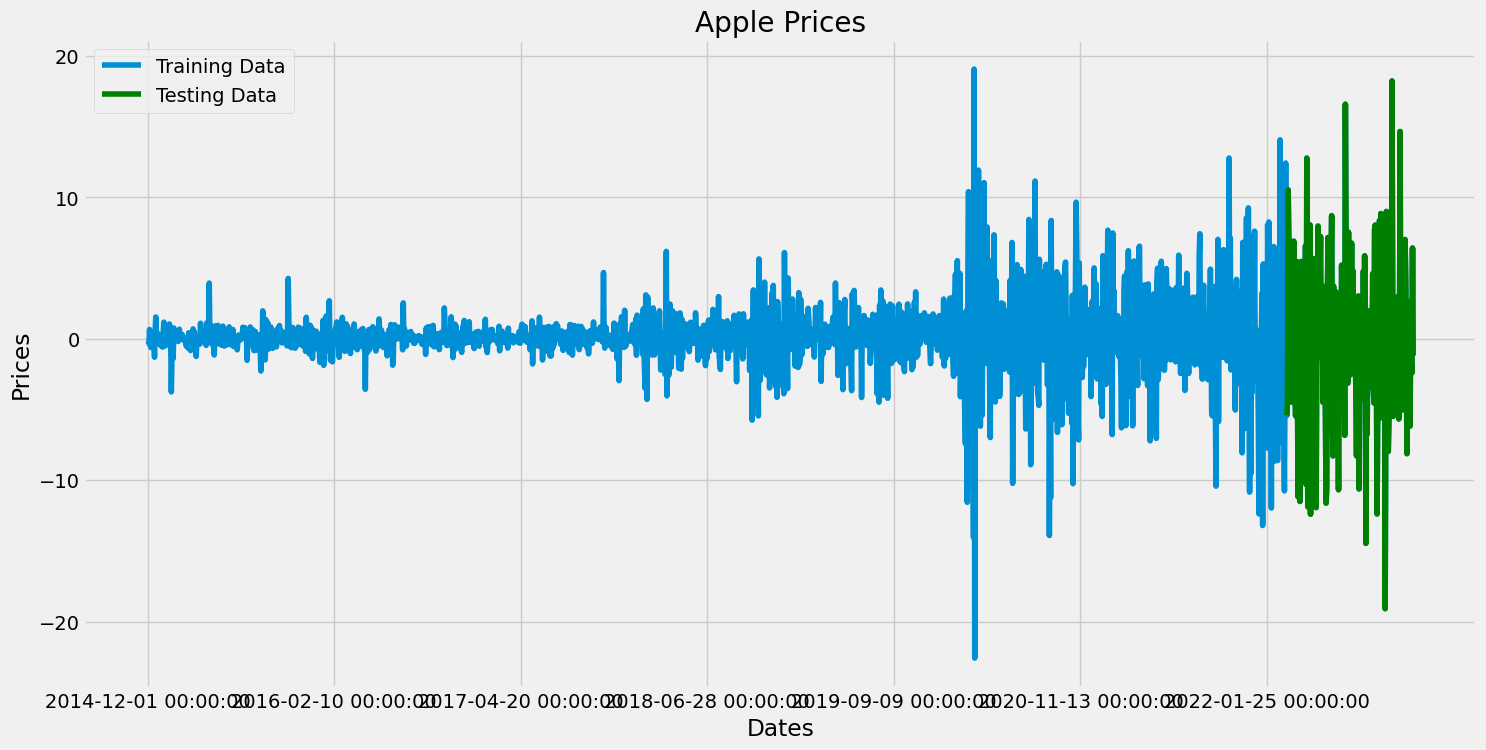

In [85]:
train_data, test_data = df[0:int(len(df)*0.5)], df[int(len(df)*0.9):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Adj Close_shift'], label='Training Data')
plt.plot(test_data['Adj Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()

In [86]:
import statsmodels.api

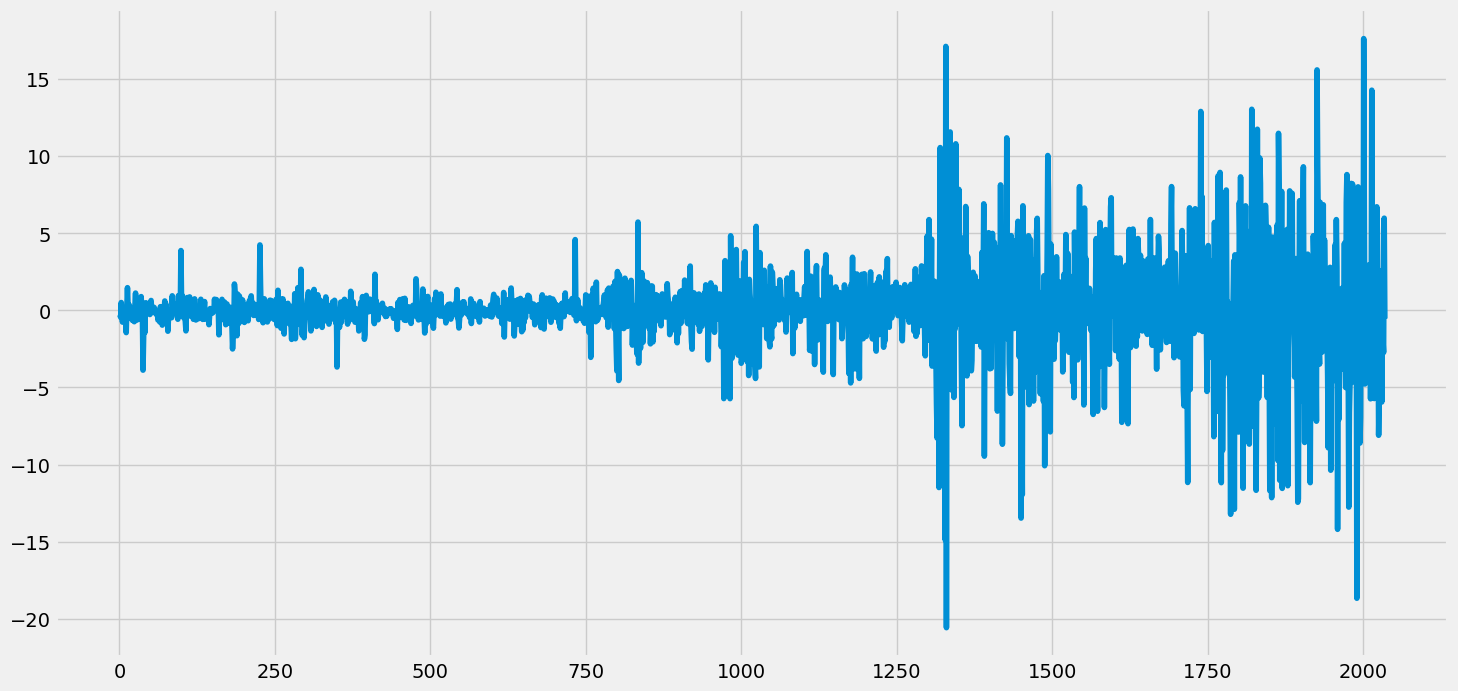

In [87]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


#model=ARIMA(train_data['Adj Close_shift'],order=(1,1,1))
model=statsmodels.tsa.arima.model.ARIMA(df['Adj Close_shift'],order=(1,0,1))
model_fit=model.fit()


#model_fit.summary()


from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

<Axes: ylabel='Density'>

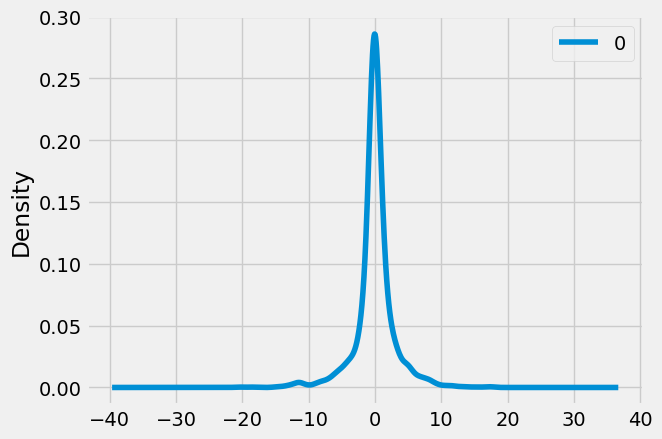

In [88]:
residuals.plot(kind='kde')

In [89]:
residuals.describe()

,0
count,2036.000000
mean,0.000065
std,3.007962
min,-20.574727
25%,-0.730238
50%,-0.029650
75%,0.861308
max,17.612341


In [90]:
train_arima = train_data['Adj Close_shift'].values
test_arima = test_data['Adj Close_shift'].values

In [91]:
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = statsmodels.tsa.arima.model.ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

<class 'list'>
MSE : 54.341
RMSE : 7.372


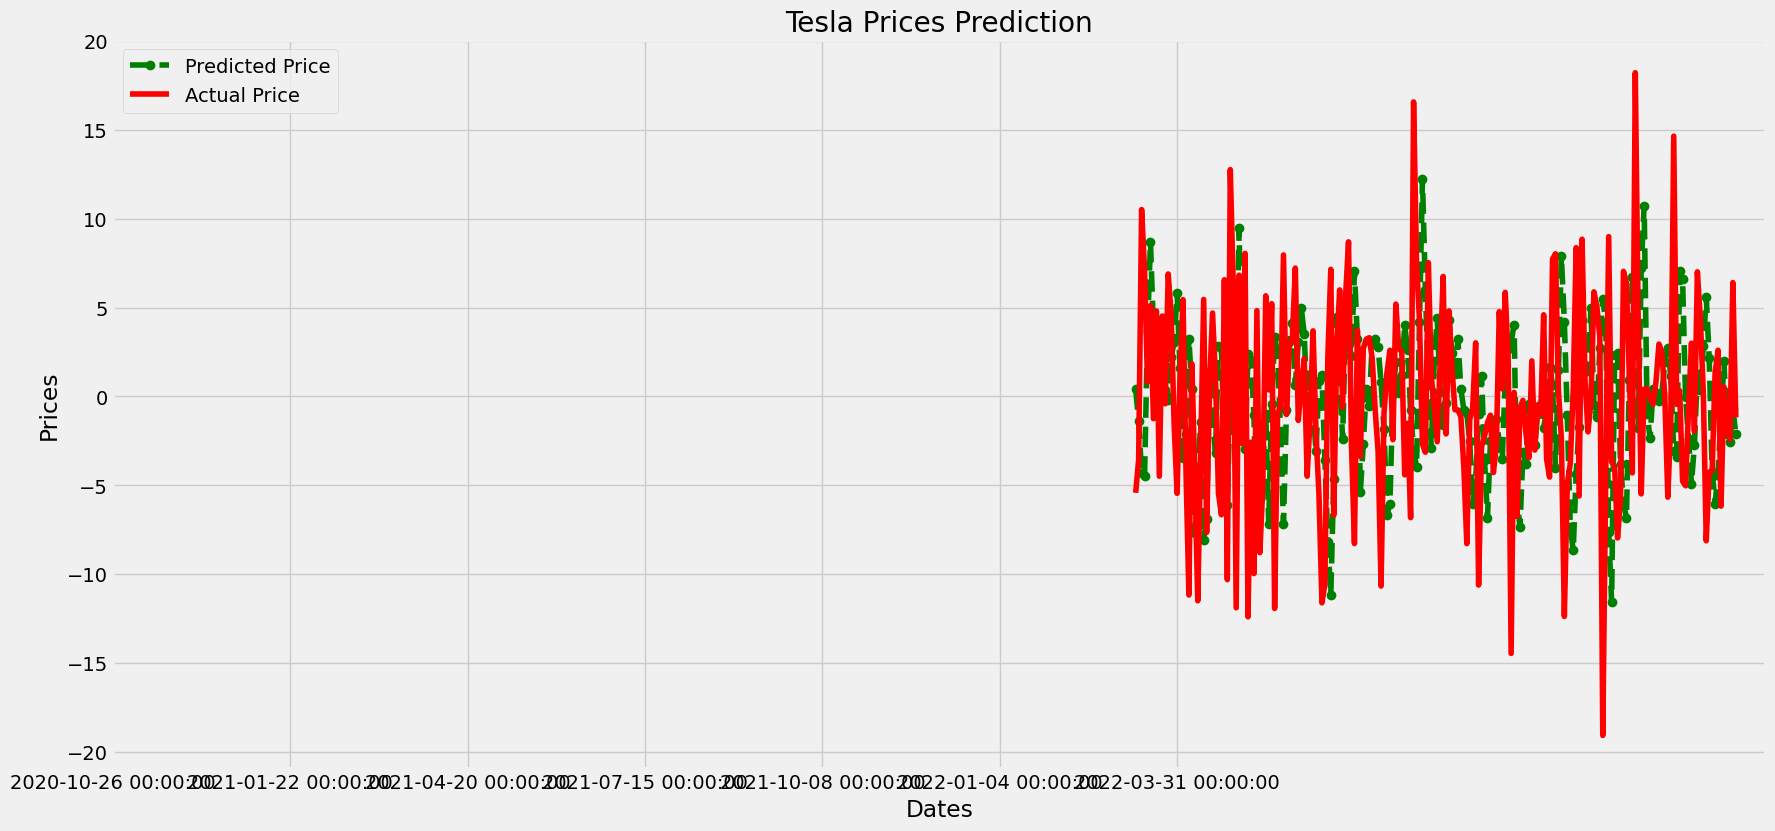

In [95]:
plt.figure(figsize=(19,9))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close_shift'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()